-------------------------------------
# ECG Beat classification:
### Model - LSTM

### Data Method - Patient hold-out

-------------------------------------

### Imports

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import os
import seaborn as sns
from sklearn import *
from sklearn.metrics import *
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

print("You are using Tensorflow version", tf.__version__)

print(tf.config.list_physical_devices('GPU'))

Mounted at /content/drive


In [ ]:
# path = './drive/MyDrive/Colab_Notebooks/ECG_with_Expected_gradients/'
path = './'

In [ ]:
os.listdir(path)

['ops.py',
 'Data',
 'eager_ops.py',
 '__pycache__',
 'example_usage_tf2.ipynb',
 'Yolas_model.ipynb',
 'Diagram_creation',
 'Grid search',
 'CNN_leaveout_patients_validation.ipynb',
 'Label_fix',
 'eval_data',
 'CNN_leaveout_patients_train_test.ipynb',
 'CNN_holdout_beats_validation.ipynb',
 'eval_data_10k',
 'RAN_MODELS',
 'LSTM_holdout_beats_validation.ipynb']

### Loading data

In [ ]:
# Loading Data
train_c1 = np.genfromtxt(path+'Data/train_beats_sc.csv', delimiter=',')
train_c0 = np.genfromtxt(path+'Data/train_beats_fc.csv', delimiter=',')
test_c1 = np.genfromtxt(path+'Data/test_beats_sc.csv', delimiter=',')
test_c0 = np.genfromtxt(path+'Data/test_beats_fc.csv', delimiter=',')

train_x_c01 = np.concatenate((train_c0[:, :-2], train_c1[:, :-2]), axis=1)
train_y_c01 = np.concatenate((train_c0[:, -2:], train_c1[:, -2:]), axis=1)

test_x_c01 = np.concatenate((test_c0[:, :-2], test_c1[:, :-2]), axis=1)
test_y_c01 = np.concatenate((test_c0[:, -2:], test_c0[:, -2:]), axis=1)

train_x = train_x_c01.reshape(-1, train_x_c01.shape[1], 1).astype('float32')
test_x = test_x_c01.reshape(-1, test_x_c01.shape[1], 1).astype('float32')

train_y = tf.keras.utils.to_categorical(train_y_c01[:,0])
test_y = tf.keras.utils.to_categorical(test_y_c01[:,0])

print("Train:")
print("x:", train_x.shape, "y:", train_y.shape)
print("Test")
print("x:", test_x.shape, "y:", test_y.shape)

Train:
x: (28984, 920, 1) y: (28984, 9)
Test
x: (27219, 920, 1) y: (27219, 9)


### Create a performance metrics function

In [ ]:
def showResults(test, pred, model_name):
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average = 'macro')
    f1score_macro = f1_score(test, pred, average='macro') 
    f1score_micro = f1_score(test, pred, average='micro') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score macro : {}".format(f1score_macro))
    print("f1score micro : {}".format(f1score_micro))
    cm=confusion_matrix(test, pred, labels=[1,2,3,4,5,6,7,8])
    return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score_macro,3), 
            round(f1score_micro, 3), cm)

### Function for building the LSTM model

In [ ]:
verbose, epoch, batch_size = 1, 10, 256
activationFunction='relu'

def getlstmModel():
    
    lstmmodel = Sequential()
    lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(train_x.shape[1],train_x.shape[2])))
    lstmmodel.add(LSTM(9, return_sequences=True))
    lstmmodel.add(MaxPooling1D(pool_size=4,padding='same'))
    lstmmodel.add(Flatten())
    lstmmodel.add(Dense(256, activation=tf.nn.relu))    
    lstmmodel.add(Dense(128, activation=tf.nn.relu))    
    lstmmodel.add(Dense(32, activation=tf.nn.relu))
    lstmmodel.add(Dense(9, activation='softmax'))
    lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    # lstmmodel.summary()
    return lstmmodel
# lstmmodel = getlstmModel()

# lstmhistory= lstmmodel.fit(train_x, train_y, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)
# lstmpredictions = lstmmodel.predict(test_x, verbose=1)

### List of models

In [ ]:
lstm1 = getlstmModel()
lstm2 = getlstmModel()
lstm3 = getlstmModel()
lstm4 = getlstmModel()
lstm5 = getlstmModel()
lstm6 = getlstmModel()
lstm7 = getlstmModel()
lstm8 = getlstmModel()
lstm9 = getlstmModel()
lstm10 = getlstmModel()

modellist = [lstm1,lstm2,lstm3,lstm4,lstm5,lstm6,lstm7,lstm8,lstm9,lstm10]

### Fitting all the models

In [ ]:
modelhistory = []
for m in range(len(modellist)):
  print("*"*10,"Model",m+1,"*"*10)
  modelhistory.append(modellist[m].fit(train_x, train_y, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size))

********** Model 1 **********
Epoch 1/10
91/91 [==============================] - 41s 358ms/step - loss: 0.4046 - accuracy: 0.8762 - val_loss: 0.0991 - val_accuracy: 0.9655
Epoch 2/10
91/91 [==============================] - 31s 338ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.0771 - val_accuracy: 0.9760
Epoch 3/10
91/91 [==============================] - 31s 339ms/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.0572 - val_accuracy: 0.9829
Epoch 4/10
91/91 [==============================] - 31s 337ms/step - loss: 0.0251 - accuracy: 0.9936 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 5/10
91/91 [==============================] - 30s 335ms/step - loss: 0.0163 - accuracy: 0.9953 - val_loss: 0.0500 - val_accuracy: 0.9871
Epoch 6/10
91/91 [==============================] - 30s 335ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0390 - val_accuracy: 0.9903
Epoch 7/10
91/91 [==============================] - 31s 336ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss:

### Model predictions

In [ ]:
modelpreds = []
for m in range(len(modellist)):
  print("*"*10,"Model",m+1,"*"*10)
  modelpreds.append(np.argmax(modellist[m].predict(test_x, verbose=1),axis=1))

********** Model 1 **********
851/851 [==============================] - 90s 105ms/step
********** Model 2 **********
851/851 [==============================] - 88s 103ms/step
********** Model 3 **********
851/851 [==============================] - 90s 105ms/step
********** Model 4 **********
851/851 [==============================] - 90s 105ms/step
********** Model 5 **********
851/851 [==============================] - 90s 105ms/step
********** Model 6 **********
851/851 [==============================] - 86s 100ms/step
********** Model 7 **********
851/851 [==============================] - 91s 105ms/step
********** Model 8 **********
851/851 [==============================] - 90s 105ms/step
********** Model 9 **********
851/851 [==============================] - 90s 105ms/step
********** Model 10 **********
851/851 [==============================] - 90s 105ms/step


### Generating the metrics

In [ ]:
results = []
lstm_actual_value=np.argmax(test_y,axis=1)
for p in range(len(modelpreds)):
  print("*"*10,"Model",p+1,"*"*10)
  results.append(showResults(lstm_actual_value, modelpreds[p],'LSTM'+str(p)))

********** Model 1 **********
Accuracy  : 0.9793526580697307
Precision : 0.8935037986251402
Recall : 0.9639971295727929
f1score macro : 0.9230275843158076
f1score micro : 0.9793526580697307
********** Model 2 **********
Accuracy  : 0.9789852676439252
Precision : 0.8945719030676447
Recall : 0.965635762520347
f1score macro : 0.9262492055409581
f1score micro : 0.9789852676439252
********** Model 3 **********
Accuracy  : 0.9758624490245784
Precision : 0.8893592640960588
Recall : 0.9641585733406767
f1score macro : 0.9215730869234275
f1score micro : 0.9758624490245784
********** Model 4 **********
Accuracy  : 0.9760828832800618
Precision : 0.889960662095551
Recall : 0.9647047773713524
f1score macro : 0.9233962249058653
f1score micro : 0.9760828832800618
********** Model 5 **********
Accuracy  : 0.9473896910246519
Precision : 0.7819922597462475
Recall : 0.955916407037056
f1score macro : 0.8442414965682508
f1score micro : 0.9473896910246519
********** Model 6 **********
Accuracy  : 0.976927881

### Generating the confusion matrices

In [ ]:
cms = []
for p in modelpreds:
  cms.append(confusion_matrix(lstm_actual_value, p, normalize='true'))

### Extracting model train and validation accuracy & loss

In [ ]:
modelosses = []
modeleval_losses = []
modelacc = []
modeleval_acc = []
for h in modelhistory:
  modelosses.append(h.history['loss'])
  modeleval_losses.append(h.history['val_loss'])
  modelacc.append(h.history['accuracy'])
  modeleval_acc.append(h.history['val_accuracy'])
modelosses = np.array(modelosses)
modeleval_losses = np.array(modeleval_losses)
modelacc = np.array(modelacc)
modeleval_acc = np.array(modeleval_acc)
# losses , eval_losses, accuracy, eval_accuracy
history = np.array([modelosses, modeleval_losses, modelacc, modeleval_acc])

### Saving the data

In [ ]:
# Saving data LSTM patient leavout
new_path = path+"eval_data_10k/lstm_ph/"

modelpreds = np.array(modelpreds)
results = np.array(results)
cms = np.array(cms)
# modelhistory = np.array(modelhistory)
np.save(new_path+"lstm_modelpreds.npy", modelpreds)
np.save(new_path+"lstm_results.npy", results)
np.save(new_path+"lstm_cms.npy", cms)
np.save(new_path+"lstm_history.npy", history )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


INFO:tensorflow:Assets written to: ram://c519202a-251c-4771-9958-6293a486f425/assets


INFO:tensorflow:Assets written to: ram://c519202a-251c-4771-9958-6293a486f425/assets


INFO:tensorflow:Assets written to: ram://2012816e-f897-464d-8c1c-492e53660998/assets


INFO:tensorflow:Assets written to: ram://2012816e-f897-464d-8c1c-492e53660998/assets


INFO:tensorflow:Assets written to: ram://c93f75e9-e0b8-46fa-ab40-d6dc09598995/assets


INFO:tensorflow:Assets written to: ram://c93f75e9-e0b8-46fa-ab40-d6dc09598995/assets


INFO:tensorflow:Assets written to: ram://7d64ab79-3ba6-4805-a757-c910b4fa3561/assets


INFO:tensorflow:Assets written to: ram://7d64ab79-3ba6-4805-a757-c910b4fa3561/assets


INFO:tensorflow:Assets written to: ram://e6dc8099-be2f-42d7-a873-a230c593b673/assets


INFO:tensorflow:Assets written to: ram://e6dc8099-be2f-42d7-a873-a230c593b673/assets


INFO:tensorflow:Assets written to: ram://57e00367-35c4-4570-bee0-e28b1fa03e83/assets


INFO:tensorflow:Assets written to: ram://57e00367-35c4-4570-bee0-e28b1fa03e83/assets


INFO:tensorflow:Assets written to: ram://ec7099be-2eb9-437f-9066-af2d8790e06f/assets


INFO:tensorflow:Assets written to: ram://ec7099be-2eb9-437f-9066-af2d8790e06f/assets


INFO:tensorflow:Assets written to: ram://15f6d886-187c-4e58-bff1-034d47de8d40/assets


INFO:tensorflow:Assets written to: ram://15f6d886-187c-4e58-bff1-034d47de8d40/assets


INFO:tensorflow:Assets written to: ram://864214ff-efd3-4467-a719-bb413ec6f106/assets


INFO:tensorflow:Assets written to: ram://864214ff-efd3-4467-a719-bb413ec6f106/assets


INFO:tensorflow:Assets written to: ram://d4712763-9c70-4f93-b077-c495104dc2ad/assets


INFO:tensorflow:Assets written to: ram://d4712763-9c70-4f93-b077-c495104dc2ad/assets


### Visualising the Mean Confusion Matrix

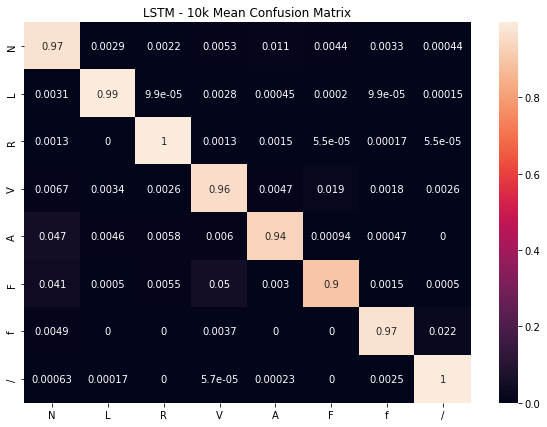

In [ ]:
categories=['N','L','R','V','A','F','f','/']
cm = np.mean(cms, axis=0)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)
plt.title('LSTM - 10k Mean Confusion Matrix')
# plt.savefig("lstm_mean_cm_pl.png", dpi=300)
plt.show()

### Mean Metrics

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "f1-score macro", "f1-score micro"]
mean_metrics = np.mean(results[:,1:6], axis=0)
for i in range(len(mean_metrics)):
  print(metrics[i],":",mean_metrics[i])

Accuracy : 0.9737000000000002
Precision : 0.877
Recall : 0.9649000000000001
f1-score macro : 0.9138000000000002
f1-score micro : 0.9737000000000002


### Mean LSTM Loss vs Accuracy Plot

In [ ]:
# Save the model so we can visualize it with Netron (https://github.com/lutzroeder/netron):
# tf.keras.models.save_model(lstmmodel, 'lstmmodel_module2.h5')
modelosses = []
modeleval_losses = []
modelacc = []
modeleval_acc = []
for h in modelhistory:
  modelosses.append(h.history['loss'])
  modeleval_losses.append(h.history['val_loss'])
  modelacc.append(h.history['accuracy'])
  modeleval_acc.append(h.history['val_accuracy'])
modelosses = np.array(modelosses)
modeleval_losses = np.array(modeleval_losses)
modelacc = np.array(modelacc)
modeleval_acc = np.array(modeleval_acc)

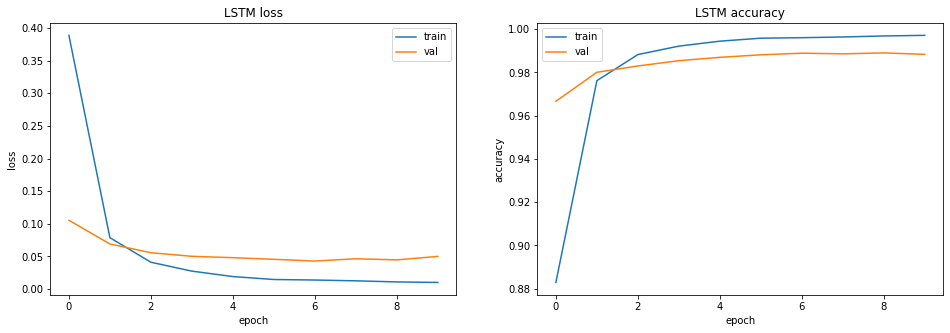

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax[0].plot(np.mean(modelosses, axis=0))
ax[0].plot(np.mean(modeleval_losses, axis=0))
ax[0].set_title('LSTM loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper right')
ax[1].plot(np.mean(modelacc,axis=0))
ax[1].plot(np.mean(modeleval_acc, axis=0))
ax[1].set_title('LSTM accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')
plt.show()
# fig.savefig('lstm_leaveout_patients_loss_and_accuracy.jpg')